#Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

#Reading the raw file from Files

In [7]:
data = pd.read_csv('/content/segmentation data.csv', index_col = 0)

#Reading the data

In [8]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


#Viewing the descriptive stats of the data

In [9]:
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


#Check correlation [-1 to 1]

In [10]:
data.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


from matplotlib import pyplot as plt
_df_0['Sex'].plot(kind='hist', bins=20, title='Sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Marital status'].plot(kind='hist', bins=20, title='Marital status')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Education'].plot(kind='hist', bins=20, title='Education')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Sex', y='Marital status', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Marital status', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Age', y='Education', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Education', y='Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Sex'].plot(kind='line', figsize=(8, 4), title='Sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Marital status'].plot(kind='line', figsize=(8, 4), title='Marital status')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Education'].plot(kind='line', figsize=(8, 4), title='Education')
plt.gca().spines[['top', 'right']].set_visible(False)

#Visualize the above data

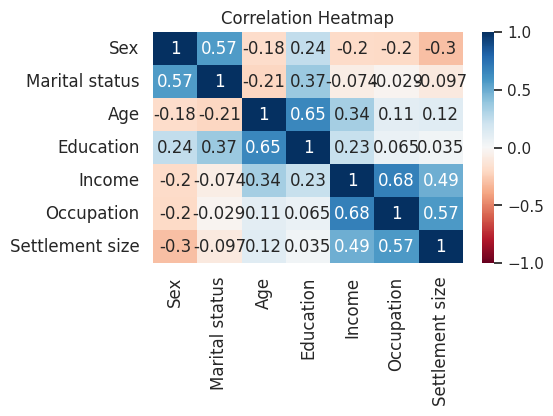

In [16]:
#importing matplot lib and seaborn packages

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Visualizing in a plot

plt.figure(figsize=(5,3))
s = sns.heatmap(data.corr(),
annot=True,
cmap='RdBu',
vmin=-1,
vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

#Visualize the info using a scatter plot

Text(0.5, 1.0, 'Scatter Plot of correlation between age & income')

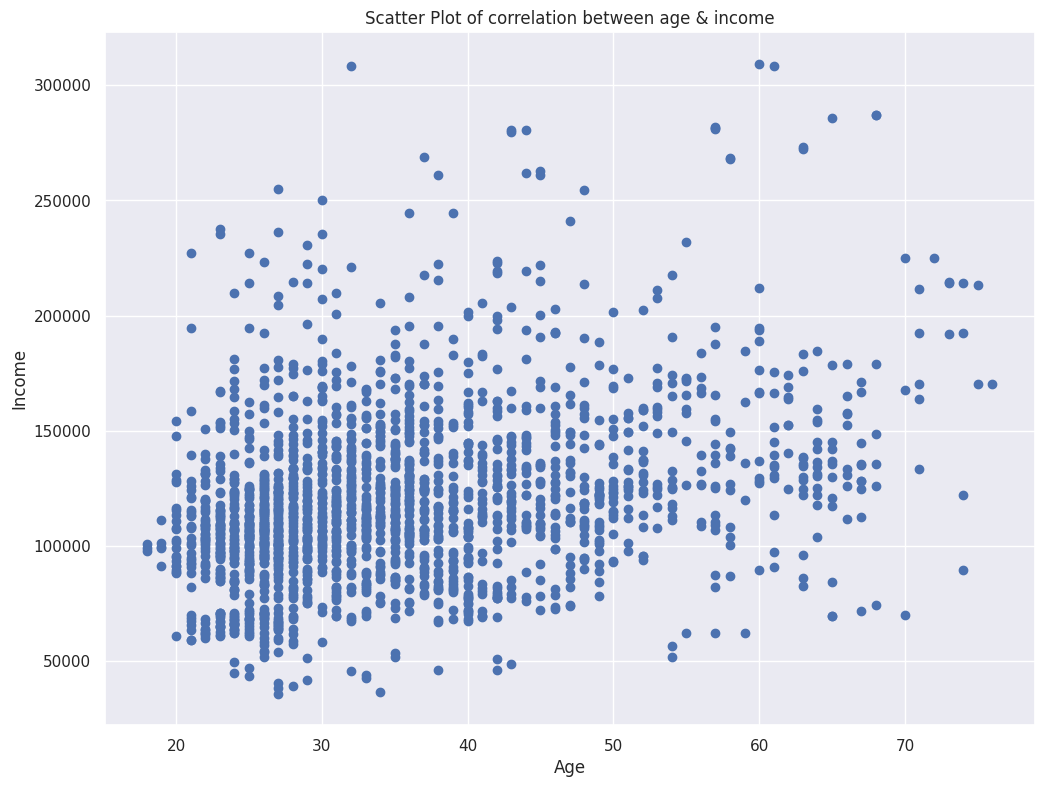

In [21]:
plt.figure(figsize=(12,9))
plt.scatter(data.iloc[:,2],data.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot of correlation between age & income')

# Data cleaning / Standardization

In [22]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
data_std = scaler.fit_transform(data)

Clustering Data with Hierarchical Clustering method & visualizing it

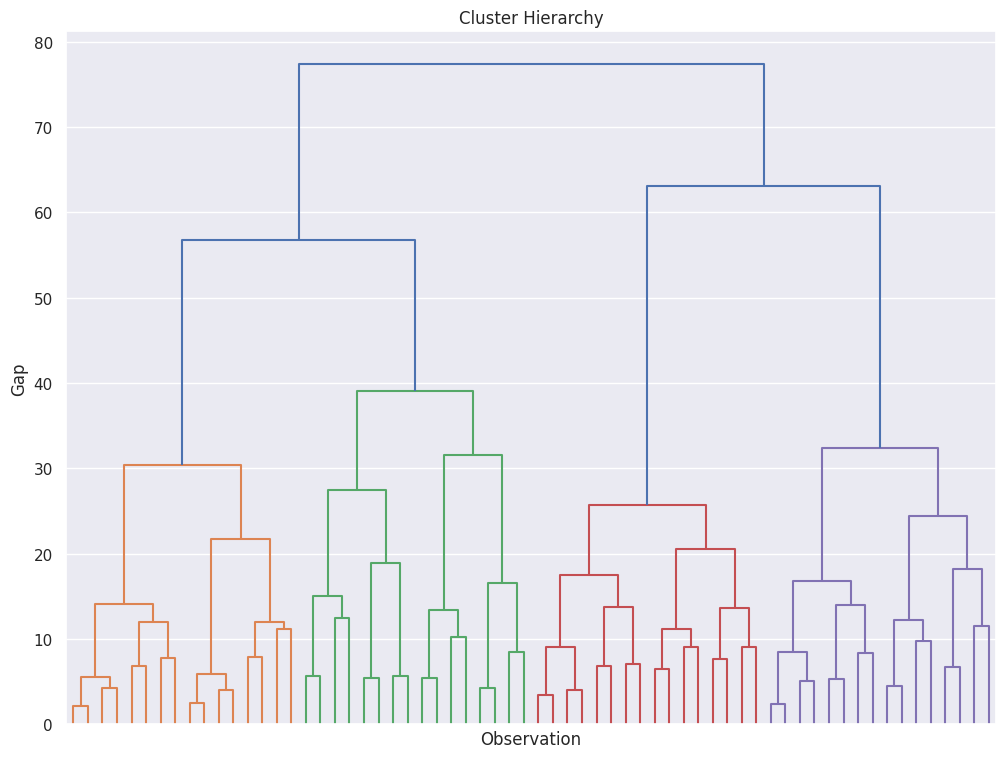

In [28]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
hierarchy_cluster = linkage(data_std, method='ward')

#Visualization
plt.figure(figsize=(12,9))
plt.title('Cluster Hierarchy')
plt.xlabel('Observation')
plt.ylabel('Gap')
dendrogram(hierarchy_cluster, truncate_mode='level', p=5, show_leaf_counts=False, no_labels=True )
plt.show()


The above observation shows us that there are 4 clustures in the data

# Flat clustering using K-means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

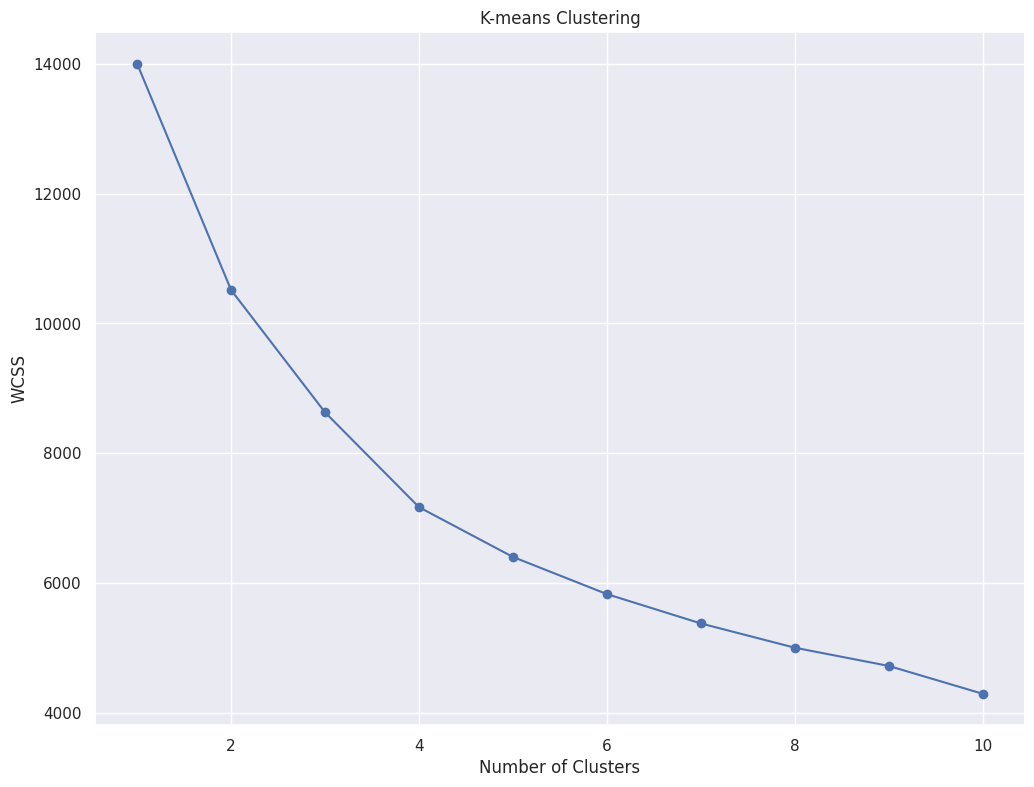

In [47]:
#importing libraries
from sklearn.cluster import KMeans

#using WCSS to look for number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)

#visualizing WCSS results
plt.figure(figsize=(12, 9))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

# Performing clustering for 4

In [48]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data_std)

#backup the data
data_kmeans = data.copy()
data_kmeans['segment'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Analyzing clustur results

In [49]:
data_kmeans_analisis = data_kmeans.groupby('segment').mean()
data_kmeans_analisis

#data is now broken into 4 segments
#Based on the segment parameters, the segments are named as follows
  # 0 - Well-off Cluster
  # 1 - Fewer-Opportunity Cluster
  # 2 - Standard
  # 3 - Carrer Focus


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
segment,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


# Counting the total customers in each segment and storing them in a new column

In [50]:
#Total customers
data_kmeans_analisis['Total_Customers'] = data_kmeans.groupby(['segment', 'Sex']).size().reset_index(name='count')['count']
data_kmeans_analisis

#Total customers as a share of total population
data_kmeans_analisis['Rate'] = data_kmeans_analisis['Total_Customers']/data_kmeans_analisis ['Total_Customers'].sum()
data_kmeans_analisis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Total_Customers,Rate
segment,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,131,0.180690
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,132,0.182069
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,299,0.412414
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,163,0.224828


# Renaming the segments

In [51]:
data_kmeans_analisis.rename({0:'Well-Off', 1:'Fewer-Oppotinities', 2:'Standard', 3:'Career-Focus'})

#Based on below output we can understand that Standard is the largest segment and well-off is the smallest segment

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Total_Customers,Rate
segment,,,,,,,,,
Well-Off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,131,0.180690
Fewer-Oppotinities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,132,0.182069
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,299,0.412414
Career-Focus,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,163,0.224828


# Visualizing the segments in scatter plot

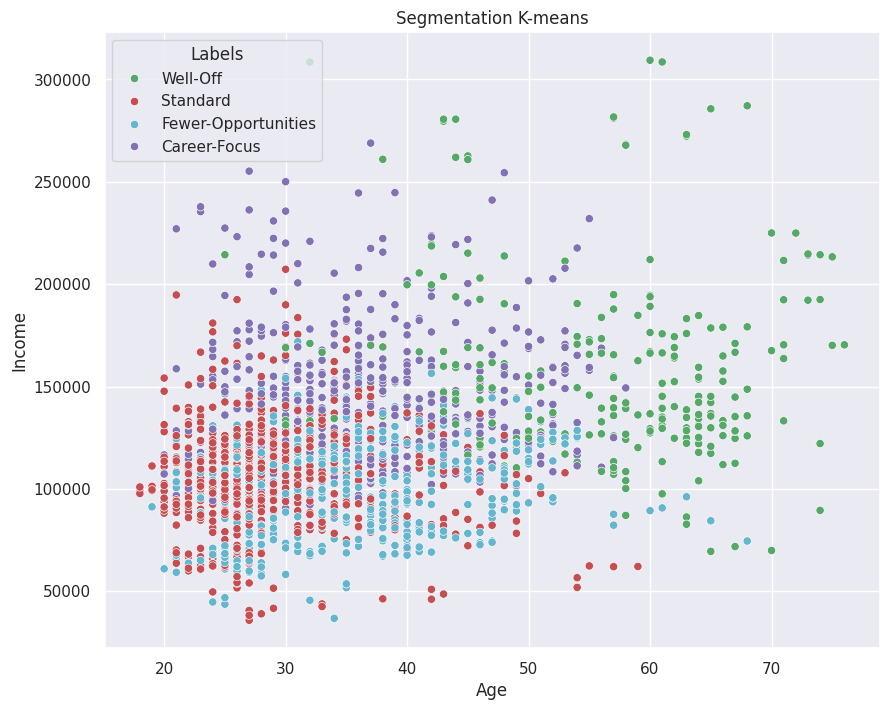

In [71]:
data_kmeans['Labels'] = data_kmeans['segment'].map({0: 'Well-Off', 1: 'Fewer-Opportunities', 2: 'Standard', 3: 'Career-Focus'})
x_axis = data_kmeans['Age']
y_axis = data_kmeans['Income']

plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=data_kmeans['Labels'], palette=['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

#Observation - Well off segment are clearly distinguishable from others. But the other 3 segments are still mixed. So we use PCA to split them up.

In [53]:
from sklearn.decomposition import PCA #importing principle component analysis algo
pca = PCA()
pca.fit(data_std)
pca.explained_variance_ratio_ #see the ratio variaton in the data

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

The above output suggests that there are 7 components in total. Each number indicates how much variability is there in each component. We then move to visualize these variabilities

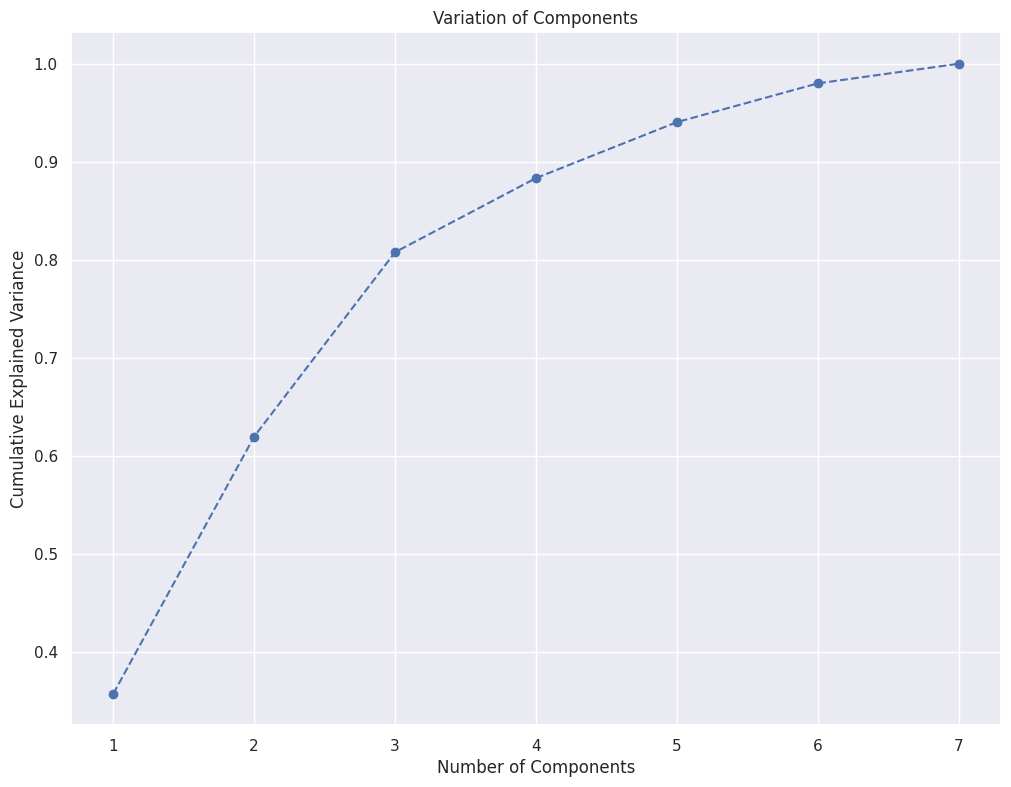

In [55]:
plt.figure(figsize=(12, 9))
plt.plot(range(1, 8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', color='b')
plt.title('Variation of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Recall and display PCA data

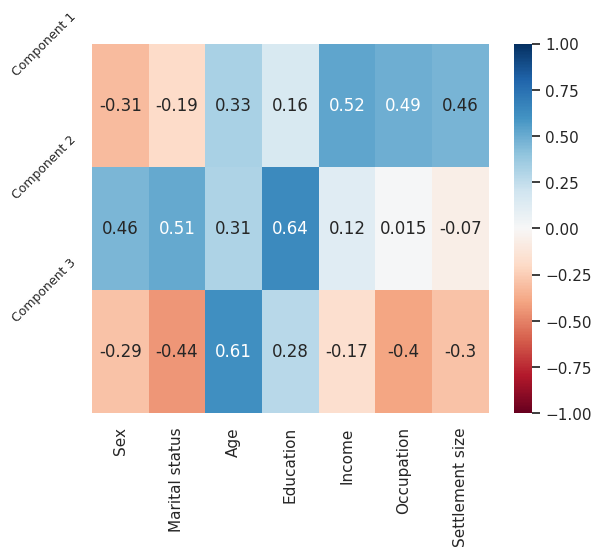

In [59]:
# Creating a 3x7 array of variations
pca=PCA(n_components=3)
pca.fit(data_std)
pca.components_

#Moving the array into a data set
data_std_pca = pd.DataFrame(data=pca.components_, columns=data.columns.values, index=['Component 1','Component 2','Component 3'])
data_std_pca

#Visualizing the data frame
sns.heatmap(data_std_pca, vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.yticks([0, 1, 2], ['Component 1', 'Component 2', 'Component 3'], rotation=45, fontsize=9)
plt.show()


# Performing transformations on data

In [61]:
pca.transform(data_std)

skor_pca = pca.transform(data_std)

# Re-segmentation the data using K-Means and PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

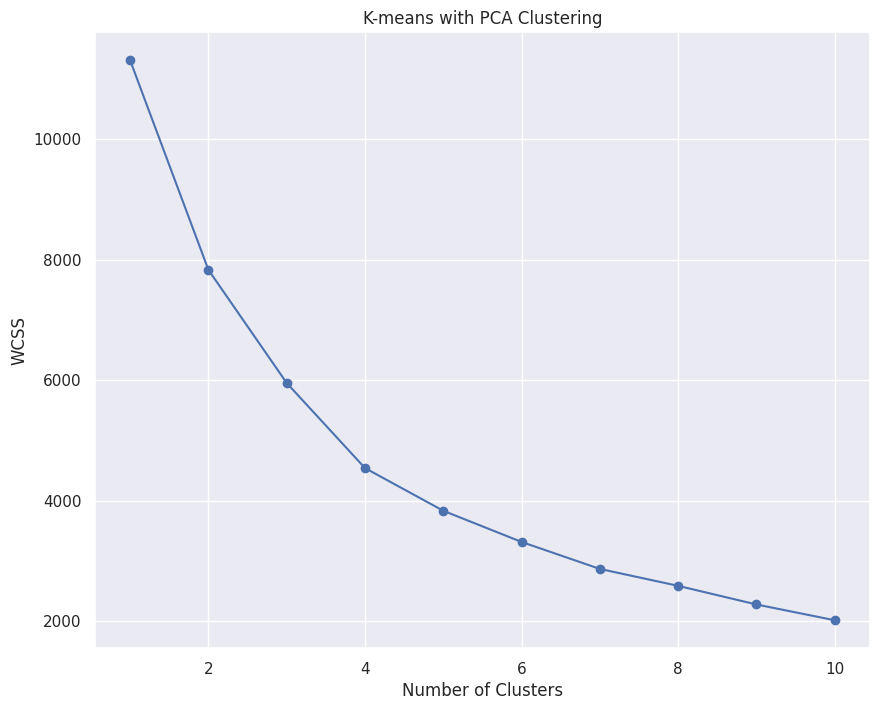

In [62]:
#Running to check clustures
wcss = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(skor_pca)
    wcss.append(kmeans_pca.inertia_)

#Visualizing the total clusters
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

# Perform K Means clustering on the PCA data and display results

In [64]:
#K means clustering using 4 clusters
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(skor_pca)
data_pca_kmeans = pd.concat([data.reset_index(drop=True), pd.DataFrame(skor_pca)], axis=1)
data_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']
data_pca_kmeans['segment'] = kmeans_pca.labels_

#Display the results
data_pca_kmeans_freq = data_pca_kmeans.groupby(['segment']).mean()
data_pca_kmeans_freq


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
segment,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [66]:
#Renaming the segments based on the analysis on the above data frame
data_pca_kmeans_freq['Total'] = data_pca_kmeans.groupby(['segment', 'Sex']).size().reset_index(name='count')['count']
data_pca_kmeans_freq['Mean'] = data_pca_kmeans_freq['Total'] / data_pca_kmeans_freq['Total'].sum()
data_pca_kmeans_freq = data_pca_kmeans_freq.rename({0: 'Standard', 1: 'Career-Focus', 2: 'Fewer-Opportunity', 3: 'Well-Off'})
data_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Total,Mean
segment,,,,,,,,,,,,
Standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,69,0.054118
Career-Focus,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,623,0.488627
Fewer-Opportunity,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,567,0.444706
Well-Off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,16,0.012549


In [67]:
# Adding segment name in the legend columns

data_pca_kmeans['Legend'] = data_pca_kmeans['segment'].map({0: 'Standard', 1: 'Career-Focus', 2: 'Fewer-Opportunity', 3: 'Well-Off'})
data_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,segment,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,Well-Off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0,Standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2,Fewer-Opportunity
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,Career-Focus
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,Career-Focus
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2,Fewer-Opportunity
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0,Standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2,Fewer-Opportunity
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0,Standard


# New Scatter plot with defined segments

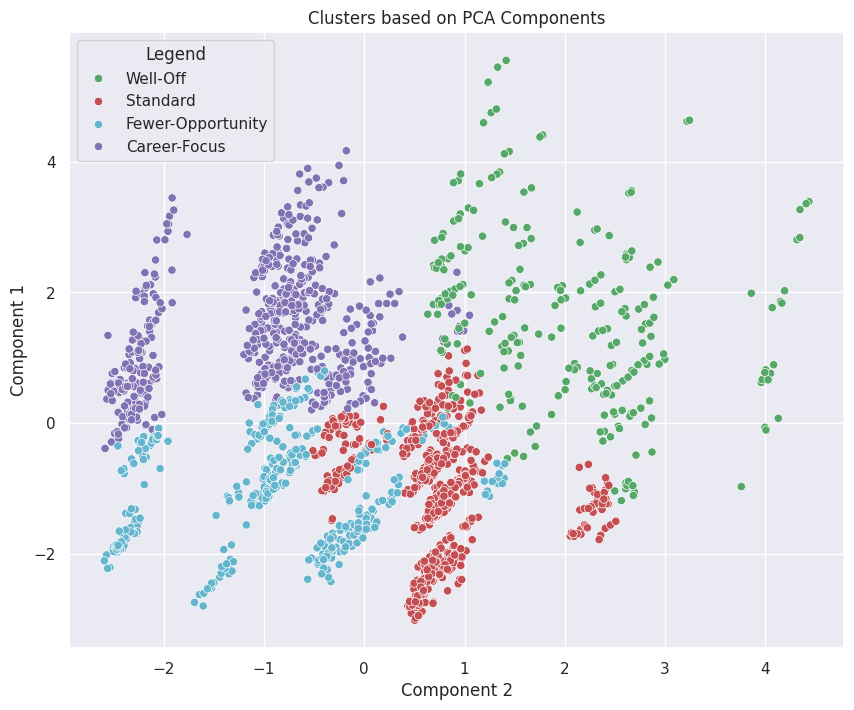

In [69]:
#Displaying Data in a scatter plot

x_axis = data_pca_kmeans['Component 2']
y_axis = data_pca_kmeans['Component 1']

plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=data_pca_kmeans['Legend'], palette=['g', 'r', 'c', 'm'])
plt.title('Clusters based on PCA Components')
plt.xlabel('Component 2')
plt.ylabel('Component 1')
plt.show()

Exporting the model using pickle library

In [70]:
import pickle

pickle.dump(scaler, open('scaler.pickle', 'wb'))
pickle.dump(pca, open('pca.pickle', 'wb'))
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))